# Image Augmentation for Deep Learning

* Generate augmented images using ImageDataGenerator in Keras
* Generate custom augmented images using **Contrast Stretching**(contrast stretching focuses on expanding the range of pixel intensities in an image. It aims to make the darkest regions darker and the brightest regions brighter, resulting in an image with improved contrast. ), **Histogram Equalization**(Histogram equalization aims to redistribute the pixel intensities in an image to achieve a more uniform histogram), **Adaptive Histogram Equalization**(Adaptive histogram equalization (AHE) is a variant of histogram equalization that takes into account local neighborhoods or regions within an image.)
* Use image augmentation for training convolutional neural network on CIFAR-10 dataset

In [ ]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from skimage.io import imread
from skimage import exposure, color
from skimage.transform import resize

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

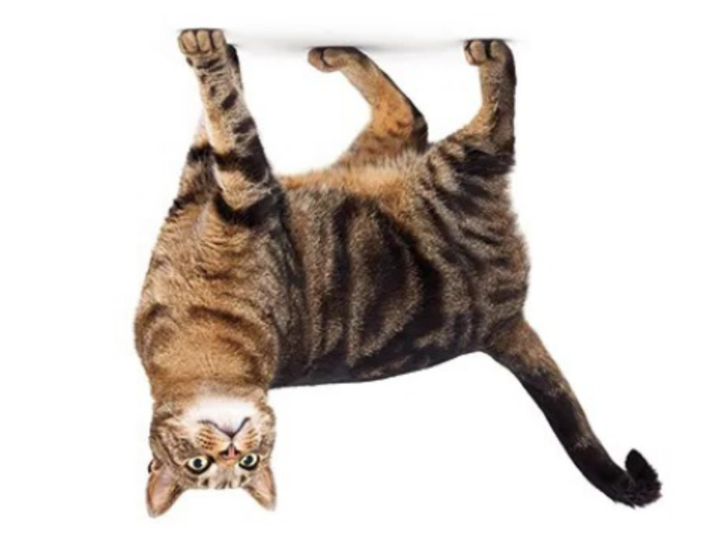

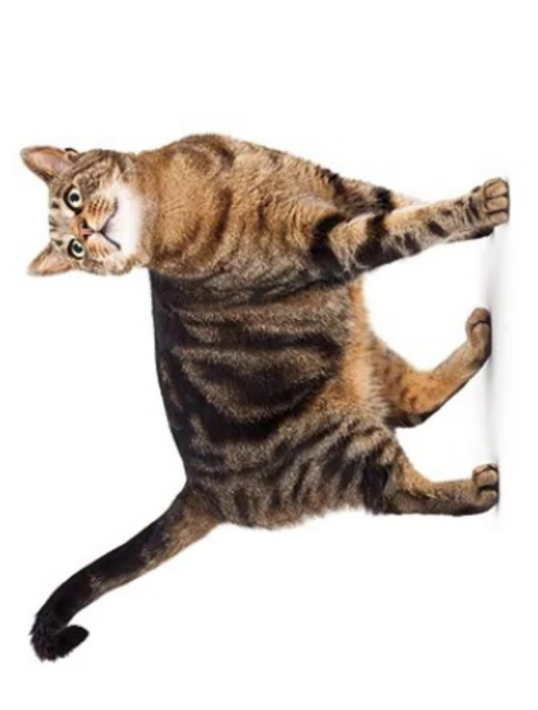

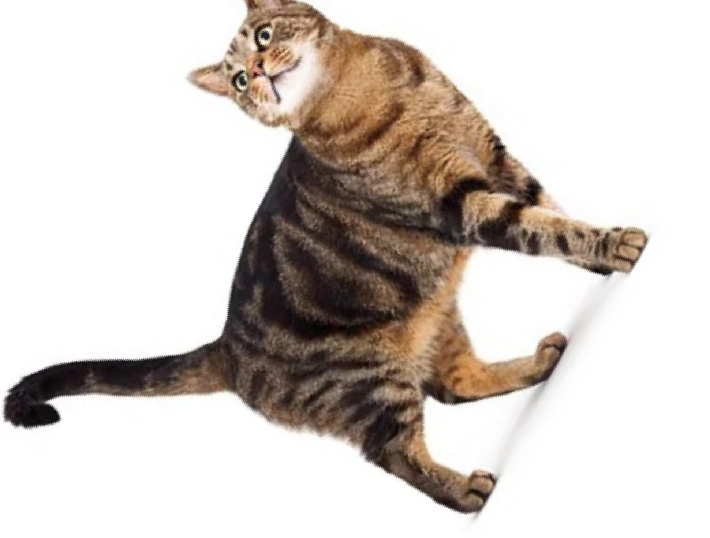

In [ ]:
# import the Python Image 
# processing Library
from PIL import Image
  
# Giving The Original image Directory 
# Specified
Original_Image = Image.open("/content/1.png")
  
# Rotate Image By 180 Degree
rotated_image1 = Original_Image.rotate(180)
  
# This is Alternative Syntax To Rotate 
# The Image
rotated_image2 = Original_Image.transpose(Image.ROTATE_90)
  
# This Will Rotate Image By 60 Degree
rotated_image3 = Original_Image.rotate(60)
  
rotated_image1.show()
rotated_image2.show()
rotated_image3.show()

# Experimenting with ImageDataGenerator

The provided code defines a function called imgGen that generates and displays augmented images based on the input image. It utilizes the ImageDataGenerator class from Keras, which is a powerful tool for generating augmented images and applying various transformations.

Overall, this code provides a convenient way to generate and visualize augmented images based on the input image using the ImageDataGenerator functionality in Keras. The specific augmentations and transformations applied to the images are determined by the provided parameters.

In [ ]:
# define function to generate images

def imgGen(img, zca=False, rotation=0., w_shift=0., h_shift=0., shear=0., zoom=0., h_flip=False, v_flip=False,  preprocess_fcn=None, batch_size=9):
    datagen = ImageDataGenerator(
            zca_whitening=zca,
            rotation_range=rotation,
            width_shift_range=w_shift,
            height_shift_range=h_shift,
            shear_range=shear,
            zoom_range=zoom,
            fill_mode='nearest',
            horizontal_flip=h_flip,
            vertical_flip=v_flip,
            preprocessing_function=preprocess_fcn,
            data_format=K.image_data_format())
    
    datagen.fit(img)

    i=0
    for img_batch in datagen.flow(img, batch_size=9, shuffle=False):
        for img in img_batch:
            plt.subplot(330 + 1 + i)
            plt.imshow(img)
            i=i+1    
        if i >= batch_size:
            break
    plt.show()

The provided code performs the following tasks:

It reads an image file using the imread function from the relevant library.
The image is displayed using plt.imshow to visualize it.
The image is then reshaped and preprocessed for further processing. It is converted to the float32 data type and normalized by dividing it by 255 to scale the pixel values between 0 and 

In summary, the code loads an image, visualizes it, prepares it for the imgGen function by reshaping and preprocessing, and then generates and displays augmented images using the imgGen function with specified augmentation settings.

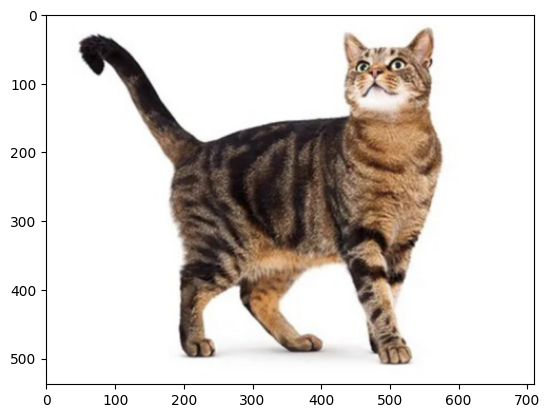

(1, 538, 710, 4)


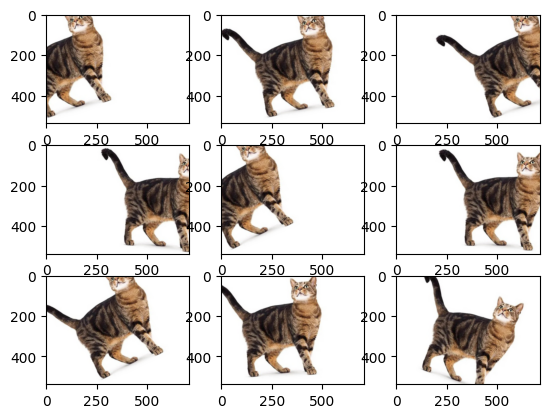

In [ ]:
# visualize the image
img = imread("/content/1.png")
plt.imshow(img)
plt.show()

# reshape it to prepare for data generator
img = img.astype('float32')
img /= 255
h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]
img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

# generate images using function imgGen
imgGen(img, rotation=30, h_shift=0.5)

# Experimenting with contrast adjustment

Contrast Stretching: The contrast_stretching function performs contrast stretching on an input image. It uses the rescale_intensity function from the exposure module of the skimage library. This method stretches the intensity values of the image to cover the full available range by rescaling the intensities based on the 2nd and 98th percentiles of the pixel intensities.

Histogram Equalization: The HE function applies Histogram Equalization to the input image using the equalize_hist function from the exposure module. Histogram equalization redistributes the intensity values of the image to achieve a more uniform histogram, enhancing the overall contrast.

Adaptive Histogram Equalization: The AHE function performs Adaptive Histogram Equalization on the input image using the equalize_adapthist function from the exposure module. Adaptive histogram equalization adapts the equalization process to smaller regions within the image. It helps to enhance local contrast and is particularly useful for images with varying illumination conditions.

In [ ]:
# Define functions for contrast adjustment


# Contrast stretching
def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

# Histogram equalization
def HE(img):
    img_eq = exposure.equalize_hist(img)
    return img_eq

# Adaptive histogram equalization
def AHE(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return img_adapteq

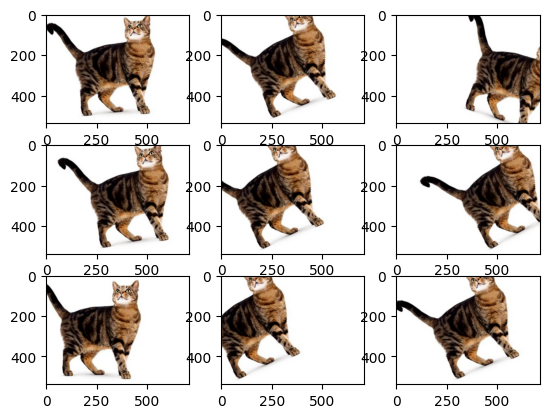

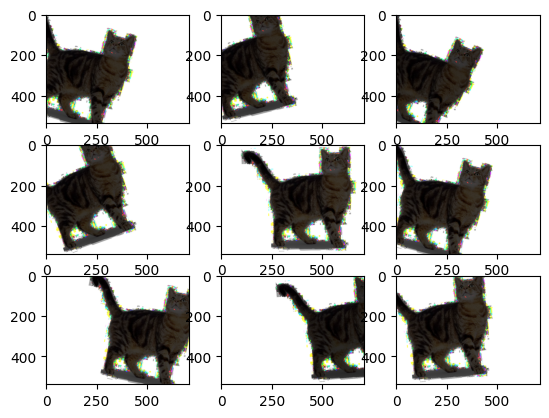

ValueError: ignored

In [ ]:
# generate images using function imgGen
imgGen(img, rotation=30, h_shift=0.5, preprocess_fcn = contrast_stretching)
imgGen(img, rotation=30, h_shift=0.5, preprocess_fcn = HE) #Histogram equalization
imgGen(img, rotation=30, h_shift=0.5, preprocess_fcn = AHE) #

# Load and preprocess CIFAR10 image data

 This code prepares the CIFAR-10 dataset for binary classification (cats vs. dogs) by filtering the relevant images and labels, reshaping the input data, normalizing the pixel values, and converting the class labels into binary class matrices.

In [ ]:
batch_size = 64
num_classes = 2
epochs = 10

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()   
print('x_train shape:', x_train.shape)

#Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

x_train shape: (50000, 32, 32, 3)
x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


# Construct CNN model

the code defines a simple CNN model with two convolutional layers, pooling layers, dropout layers for regularization, and fully connected layers. The model is compiled with the appropriate loss function, optimizer, and evaluation metric for training.

In [ ]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train model with image augmentation

If augmentation is True, an ImageDataGenerator object named datagen is created. 

The datagen is fitted to the training data using the fit method.If augmentation is True, the model is trained using the augmented data. The fit_generator function is used instead of fit, as it allows for data augmentation during training. The augmented data is generated in batches using the datagen.flow method, and the model is trained for the specified number of epochs.

If augmentation is False, the model is trained without data augmentation. The fit function is used instead of fit_generator, and the training is performed on the original training data.

AHE(ADAPTIVE HISTOGRAM EQUILIZATION)

In [ ]:
augmentation=True

if augmentation==True:
    datagen = ImageDataGenerator(
            rotation_range=0,
            width_shift_range=0,
            height_shift_range=0,
            shear_range=0,
            zoom_range=0,
            horizontal_flip=True,
            fill_mode='nearest',
#             preprocessing_function = contrast_adjusment,
#             preprocessing_function = HE,
            preprocessing_function = AHE)

    datagen.fit(x_train)
    
    print("Running augmented training now, with augmentation")
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
else:
    print("Running regular training, no augmentation")
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Running augmented training now, with augmentation


<ipython-input-20-4a7f21b6a2a4>:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),


Epoch 1/10
156/156 [==============================] - 72s 454ms/step - loss: 0.7237 - accuracy: 0.4997 - val_loss: 0.6955 - val_accuracy: 0.4775
Epoch 2/10
156/156 [==============================] - 62s 397ms/step - loss: 0.7150 - accuracy: 0.5146 - val_loss: 0.6954 - val_accuracy: 0.4815
Epoch 3/10
156/156 [==============================] - 59s 381ms/step - loss: 0.7239 - accuracy: 0.4992 - val_loss: 0.6951 - val_accuracy: 0.4785
Epoch 4/10
156/156 [==============================] - 58s 371ms/step - loss: 0.7161 - accuracy: 0.5083 - val_loss: 0.6950 - val_accuracy: 0.4785
Epoch 5/10
156/156 [==============================] - 58s 372ms/step - loss: 0.7141 - accuracy: 0.5108 - val_loss: 0.6948 - val_accuracy: 0.4805
Epoch 6/10
156/156 [==============================] - 58s 373ms/step - loss: 0.7135 - accuracy: 0.5059 - val_loss: 0.6947 - val_accuracy: 0.4810
Epoch 7/10
156/156 [==============================] - 58s 373ms/step - loss: 0.7161 - accuracy: 0.4941 - val_loss: 0.6945 - val_ac

# Visualize model accuracy

This code segment generates a line plot that visualizes the training and validation accuracy values over epochs, providing insights into the model's learning progress and performance.

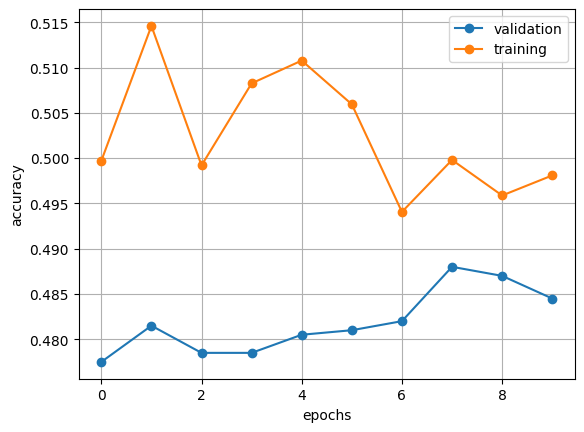

In [ ]:
#  Plots a line chart of the validation accuracy values against the number of epochs. 
plt.plot(history.epoch,history.history['val_accuracy'],'-o',label='validation')
#  Plots a line chart of the training accuracy values against the number of epochs.
plt.plot(history.epoch,history.history['accuracy'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

HE(HISTOGRAM EQUILIZATION)

In [ ]:
augmentation=True

if augmentation==True:
    datagen = ImageDataGenerator(
            rotation_range=0,
            width_shift_range=0,
            height_shift_range=0,
            shear_range=0,
            zoom_range=0,
            horizontal_flip=True,
            fill_mode='nearest',
#             preprocessing_function = contrast_adjusment,
            preprocessing_function = HE
            # preprocessing_function = AHE
            )

    datagen.fit(x_train)
    
    print("Running augmented training now, with augmentation")
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
else:
    print("Running regular training, no augmentation")
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Running augmented training now, with augmentation
Epoch 1/10


<ipython-input-23-80bf165c8f6a>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),


156/156 [==============================] - 22s 143ms/step - loss: 0.7053 - accuracy: 0.5096 - val_loss: 0.6942 - val_accuracy: 0.4900
Epoch 2/10
156/156 [==============================] - 19s 121ms/step - loss: 0.7030 - accuracy: 0.5164 - val_loss: 0.6940 - val_accuracy: 0.4935
Epoch 3/10
156/156 [==============================] - 13s 86ms/step - loss: 0.7025 - accuracy: 0.5181 - val_loss: 0.6939 - val_accuracy: 0.4935
Epoch 4/10
156/156 [==============================] - 15s 94ms/step - loss: 0.7023 - accuracy: 0.5121 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 5/10
156/156 [==============================] - 14s 87ms/step - loss: 0.7071 - accuracy: 0.4953 - val_loss: 0.6935 - val_accuracy: 0.4975
Epoch 6/10
156/156 [==============================] - 15s 94ms/step - loss: 0.7036 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.4990
Epoch 7/10
156/156 [==============================] - 15s 93ms/step - loss: 0.7003 - accuracy: 0.5065 - val_loss: 0.6931 - val_accuracy: 0.5025
E

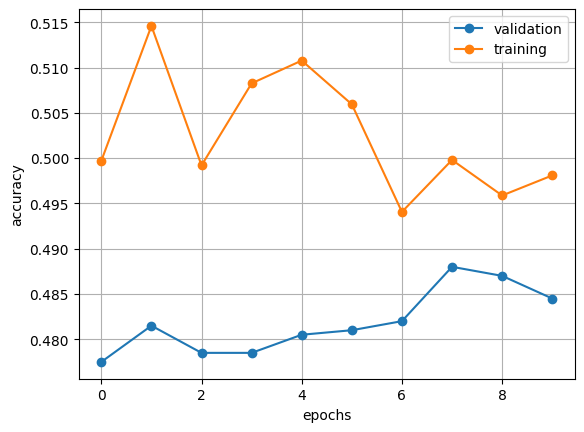

In [ ]:
#  Plots a line chart of the validation accuracy values against the number of epochs. 
plt.plot(history.epoch,history.history['val_accuracy'],'-o',label='validation')
#  Plots a line chart of the training accuracy values against the number of epochs.
plt.plot(history.epoch,history.history['accuracy'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

CONTRAST ADJUSTMENT

In [ ]:
augmentation=True

if augmentation==True:
    datagen = ImageDataGenerator(
            rotation_range=0,
            width_shift_range=0,
            height_shift_range=0,
            shear_range=0,
            zoom_range=0,
            horizontal_flip=True,
            fill_mode='nearest',
            preprocessing_function = contrast_stretching
            # preprocessing_function = HE
            # preprocessing_function = AHE
            )

    datagen.fit(x_train)
    
    print("Running augmented training now, with augmentation")
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
else:
    print("Running regular training, no augmentation")
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

NameError: ignored

In [ ]:
#  Plots a line chart of the validation accuracy values against the number of epochs. 
plt.plot(history.epoch,history.history['val_accuracy'],'-o',label='validation')
#  Plots a line chart of the training accuracy values against the number of epochs.
plt.plot(history.epoch,history.history['accuracy'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)